# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data

In [2]:
df=pd.read_csv("Energy_consumption_dataset.csv")

In [3]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [4]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015974,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

# exploratory data analysis(data visualization)

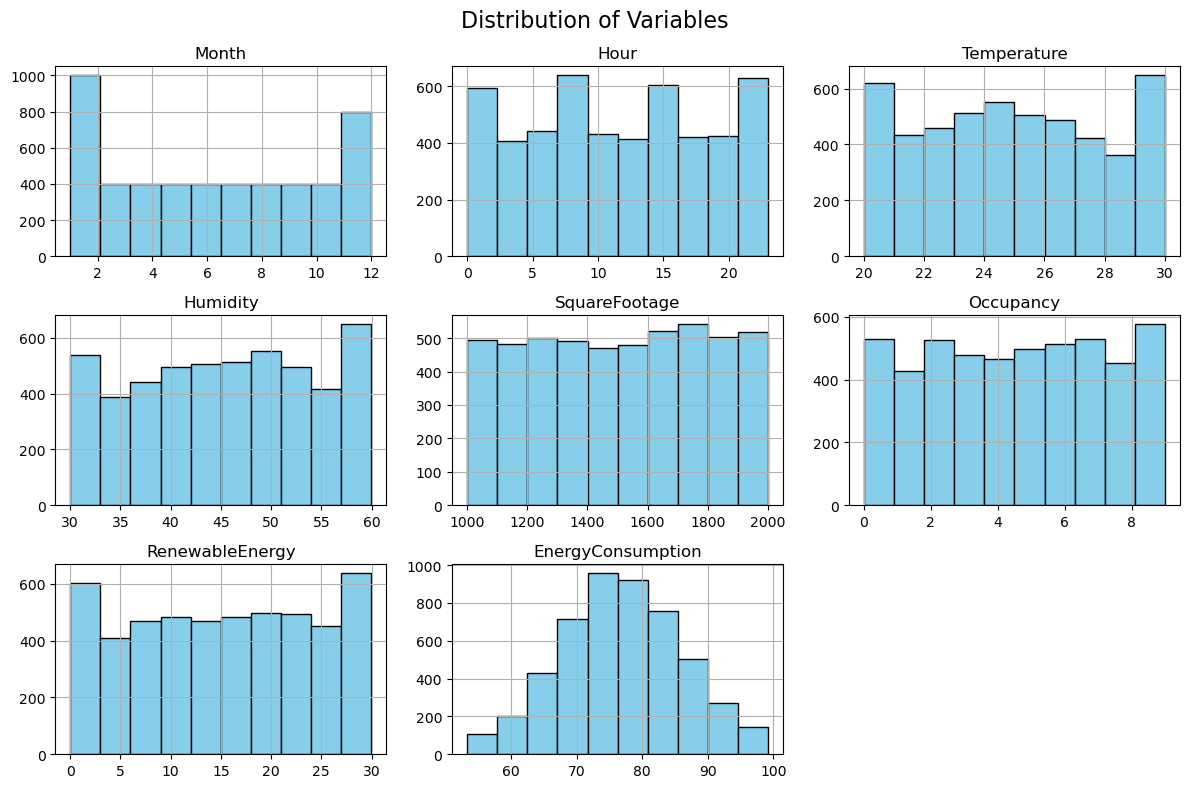

In [8]:
df.hist(bins=10, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Variables", fontsize=16)
plt.tight_layout()
plt.show()

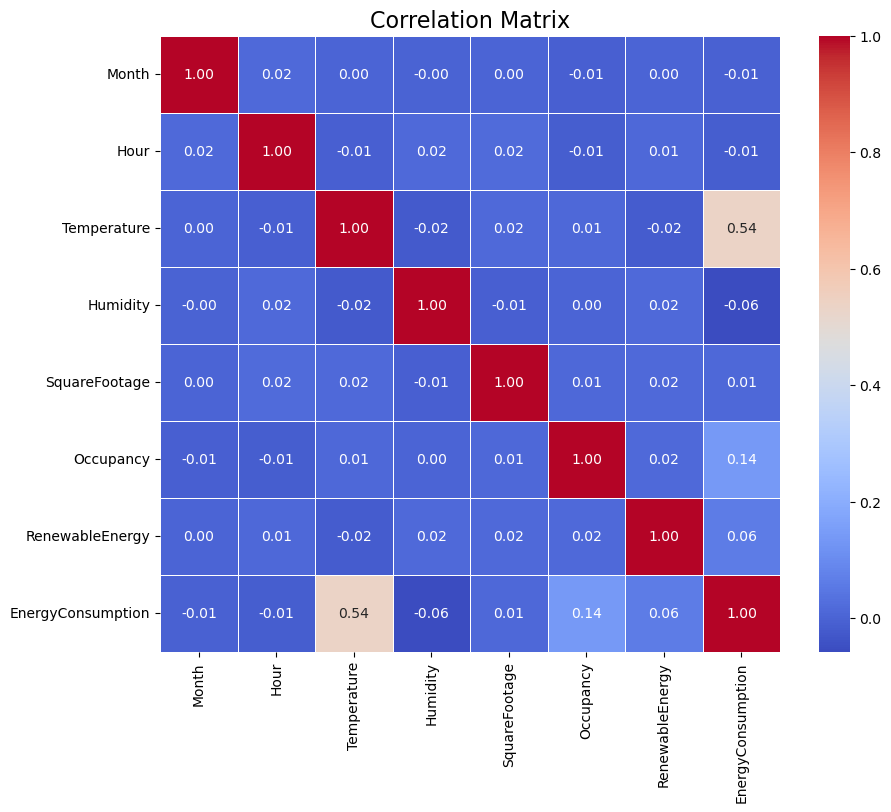

In [12]:
numeric_data = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Text(0, 0.5, 'Energy Consumption')

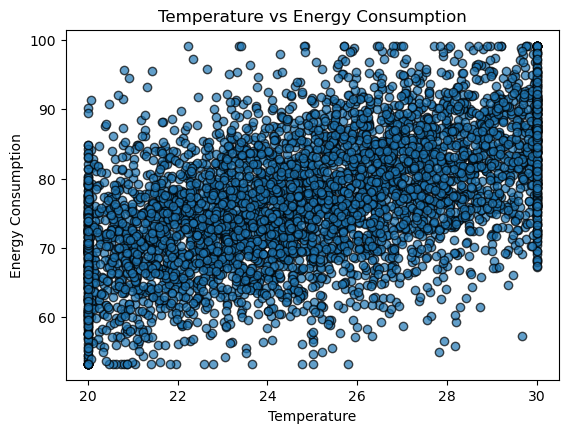

In [16]:
plt.figure(figsize=(14, 10))

# Temperature vs EnergyConsumption
plt.subplot(2, 2, 1)
plt.scatter(df["Temperature"], df["EnergyConsumption"], alpha=0.7, edgecolor="k")
plt.title("Temperature vs Energy Consumption")
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")

Text(0, 0.5, 'Energy Consumption')

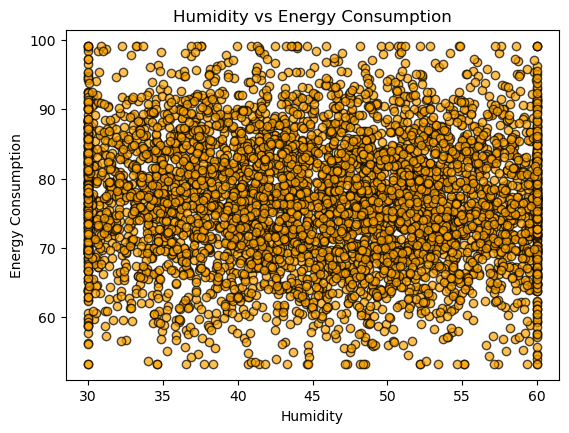

In [18]:
plt.figure(figsize=(14, 10))
# Humidity vs EnergyConsumption
plt.subplot(2, 2, 2)
plt.scatter(df["Humidity"], df["EnergyConsumption"], alpha=0.7, edgecolor="k", color="orange")
plt.title("Humidity vs Energy Consumption")
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")


Text(0, 0.5, 'Energy Consumption')

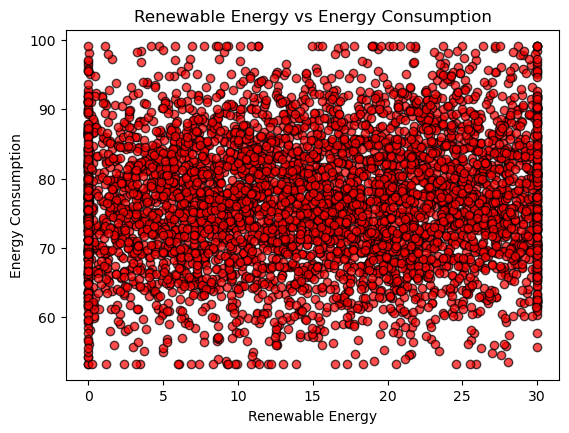

In [19]:
plt.figure(figsize=(14, 10))
# RenewableEnergy vs EnergyConsumption
plt.subplot(2, 2, 4)
plt.scatter(df["RenewableEnergy"], df["EnergyConsumption"], alpha=0.7, edgecolor="k", color="red")
plt.title("Renewable Energy vs Energy Consumption")
plt.xlabel("Renewable Energy")
plt.ylabel("Energy Consumption")

# Features and Target 

In [20]:
X = df[["Temperature", "Humidity", "SquareFootage", "RenewableEnergy"]]
y = df["EnergyConsumption"]  

In [22]:
X

,Temperature,Humidity,SquareFootage,RenewableEnergy
0,25.139433,43.431581,1565.693999,2.774699
1,27.731651,54.225919,1411.064918,21.831384
2,28.704277,58.907658,1755.715009,6.764672
3,20.080469,50.371637,1452.316318,8.623447
4,23.097359,51.401421,1094.130359,3.071969
...,...,...,...,...
4995,26.338718,52.580000,1563.567259,20.591717
4996,20.007565,42.765607,1999.982252,7.536319
4997,26.226253,30.015975,1999.982252,28.162193
4998,24.673206,50.223939,1240.811298,20.918483


# Spliting dataset(Train and Test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model 

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

# predicting test data

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([74.23013067, 82.83757795, 76.37152352, ..., 73.62391989,
       67.57523309, 77.37049827])

In [30]:
pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred}).head()

,Y_test,Y_pred
1501,84.778571,74.230131
2586,62.777773,82.837578
2653,85.231391,76.371524
1055,94.525334,84.124967
705,75.312838,69.723686


# Model evaluation 

In [31]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE,MSE,RMSE],index=["MAE","MSE","RMSE"],columns=["metrics"])

,metrics
MAE,6.328433
MSE,63.155866
RMSE,7.947067


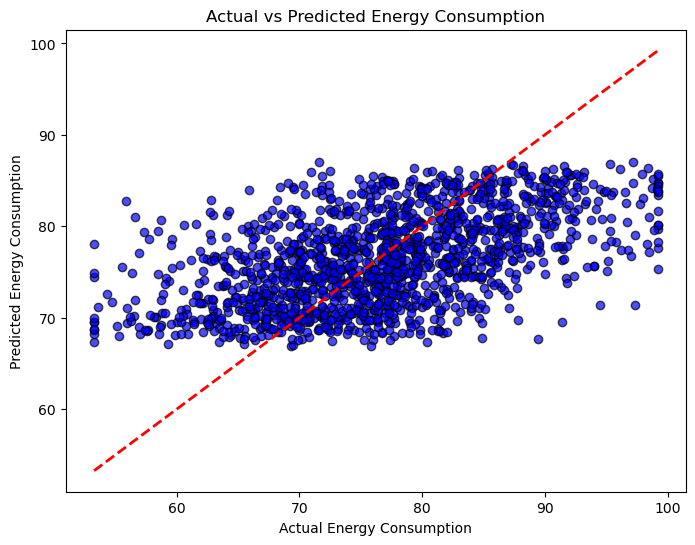

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

# Saving Model

In [33]:
from joblib import dump, load

In [34]:
final_ad=LinearRegression()
final_ad.fit(X,y)
dump(final_ad,r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\4-Linear regression\saving\Smart.joblib")

['C:\\Users\\ASUS\\Desktop\\AIoT\\domain-datasets\\4-Linear regression\\saving\\Smart.joblib']

# Load the Model

In [35]:
load_model=load(r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\4-Linear regression\saving\Smart.joblib")

In [37]:
new_data = [[25, 55, 1500, 100]]  # Temperature, Humidity, SquareFootage, RenewableEnergy


predicted_value = model.predict(new_data)

print("Predicted Energy Consumption for the given input:", predicted_value[0])


Predicted Energy Consumption for the given input: 81.46061239207766


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
